In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
def sigmoid(x, derivate=False):
    if derivate == True:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [8]:
def loss(y,e):
    return -np.sum(e*np.log(y)+(1-e)*(np.log(1-y))) / e.shape[0]

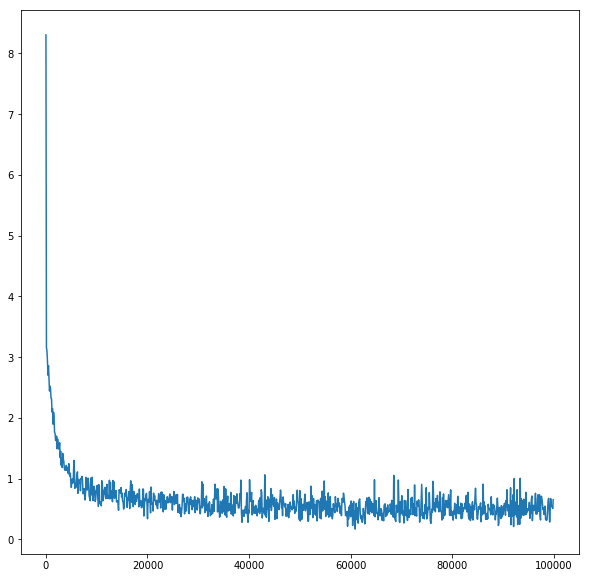

In [35]:
fig = plt.gcf()
fig.set_size_inches(10,10)
w1 = np.random.rand(785,10) * 2 - 1
w2 = np.random.rand(11,10) * 2 - 1
lr = 0.5
lossArr = []
epoch = []
for i in range(100000):
    x, yR = mnist.train.next_batch(100)
    #Forward Propagation
    a1 = np.append(np.ones((x.shape[0],1)),x,axis=1)
    z2 = a1 @ w1
    a2 = np.append(np.ones((x.shape[0],1)),sigmoid(z2),axis=1)
    z3 = a2 @ w2
    a3 = sigmoid(z3)
    
    #Backpropagation
    grad_w2 = (a3 - yR)  * sigmoid(a3,True)#/ yR.shape[0]
    grad_w1 = grad_w2 @ w2.T * sigmoid(a2,True)
    grad_w1 = grad_w1[:,1:]
    w2 -= lr * (a2.T@grad_w2)/ yR.shape[0]
    w1 -= lr * (a1.T@grad_w1)/ yR.shape[0]
    if i % 100 == 0:
        lossArr.append(loss(a3,yR))
        epoch.append(i)
plt.plot(epoch,lossArr)
plt.show()

In [36]:
def predict(inp):
    if len(inp.shape) == 1:
        inp = np.reshape(inp,(1,inp.shape[0]))
    a1 = np.append(np.ones((inp.shape[0],1)),inp,axis=1)
    z2 = a1 @ w1
    a2 = np.append(np.ones((inp.shape[0],1)),sigmoid(z2),axis=1)
    z3 = a2 @ w2
    a3 = sigmoid(z3)
    return np.argmax(a3,1)

In [37]:
print("---------------")
print("Test 0")
print("Predict: ", predict(mnist.test.images[0])[0])
print("True:    ", np.argmax(mnist.test.labels[0]))
print("---------------")
print("Test 1")
print("Predict: ",predict(mnist.test.images[1])[0])
print("True:    ",np.argmax(mnist.test.labels[1]))
print("---------------")
print("Test 2")
print("Predict: ",predict(mnist.test.images[2])[0])
print("True:    ",np.argmax(mnist.test.labels[2]))
print("---------------")
print("Test 3")
print("Predict: ",predict(mnist.test.images[3])[0])
print("True:    ",np.argmax(mnist.test.labels[3]))
print("---------------")
print("Test 4")
print("Predict: ",predict(mnist.test.images[4])[0])
print("True:    ",np.argmax(mnist.test.labels[4]))
print("")
print("---------------")
print("Model Accuracy:")
print(np.equal(np.argmax(mnist.test.labels,1),predict(mnist.test.images)).astype(int).mean() * 100,"%")
print("")
print("---------------")

---------------
Test 0
Predict:  7
True:     7
---------------
Test 1
Predict:  2
True:     2
---------------
Test 2
Predict:  1
True:     1
---------------
Test 3
Predict:  0
True:     0
---------------
Test 4
Predict:  4
True:     4

---------------
Model Accuracy:
92.93 %

---------------
